In [1]:
import laspy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from colorspacious import cspace_converter
import matplotlib as mpl
import scipy 


file_name = "220912GO15D"
#change file name according to flight being analysed

base_dir = "C:/Hobbies/programming/data/"
file_path = base_dir + file_name + '/' + file_name + "_C_A.las"
#use file_path below for multiple flights on one date and adjust carefully
#file_path = "C:/Hobbies/programming/data/220829GO15D/22GOrefilled/" + file_name + "_refilled_C.las"

In [2]:
#all files decimated into a 5cm2 grid
datasets_05 = dict(
    file_220829_e = pd.read_csv("220829GO15D_EMPTY_C_decimated_0.05.csv"),
    file_220829_r = pd.read_csv("220829GO15D_refilled_C_decimated_0.05.csv"),
    file_220905 = pd.read_csv("220905GO15D_C_decimated_0.05.csv"),
    file_220912 = pd.read_csv("220912GO15D_C_decimated_0.05.csv"),
    file_220912_50 = pd.read_csv("220912GO50D_C_decimated_0.05.csv"),
    file_220927_3MS = pd.read_csv("220927GO15D3MS_C_decimated_0.05.csv"),
    file_220927_4MS = pd.read_csv("220927GO15D4MS_C_decimated_0.05.csv"),
    file_221011 = pd.read_csv("221011GO15D_C_decimated_0.05.csv"),
    file_221020 = pd.read_csv("221020GO15D_C_decimated_0.05.csv"),
    file_221020_60 = pd.read_csv("221020GO60D_C_decimated_0.05.csv"),
    file_221101 = pd.read_csv("221101GO15D_C_decimated_0.05.csv"),
    file_221117 = pd.read_csv("221117GO15D_C_decimated_0.05.csv"),
    file_221128 = pd.read_csv("221128GO15D_C_decimated_0.05.csv"),
    file_230119 = pd.read_csv("230119GO15D_C_decimated_0.05.csv"))
      

In [3]:
#all files decimated into a 10cm2 grid
datasets_1 = dict(
    file_220829_e = pd.read_csv("220829GO15D_EMPTY_C_decimated_0.1.csv"),
    file_220829_r = pd.read_csv("220829GO15D_refilled_C_decimated_0.1.csv"),
    file_220905 = pd.read_csv("220905GO15D_C_decimated_0.1.csv"),
    file_220912 = pd.read_csv("220912GO15D_C_decimated_0.1.csv"),
    file_220912_50 = pd.read_csv("220912GO50D_C_decimated_0.1.csv"),
    file_220927_3MS = pd.read_csv("220927GO15D3MS_C_decimated_0.1.csv"),
    file_220927_4MS = pd.read_csv("220927GO15D4MS_C_decimated_0.1.csv"),
    file_221011 = pd.read_csv("221011GO15D_C_decimated_0.1.csv"),
    file_221020 = pd.read_csv("221020GO15D_C_decimated_0.1.csv"),
    file_221020_60 = pd.read_csv("221020GO60D_C_decimated_0.1.csv"),
    file_221101 = pd.read_csv("221101GO15D_C_decimated_0.1.csv"),
    file_221117 = pd.read_csv("221117GO15D_C_decimated_0.1.csv"),
    file_221128 = pd.read_csv("221128GO15D_C_decimated_0.1.csv"),
    file_230119 = pd.read_csv("230119GO15D_C_decimated_0.1.csv"))

In [4]:
def file_difference(data1, data2):
    zdif = data1.set_index(['x', 'y']).z - data2.set_index(['x', 'y']).z    
    return zdif

def difference_file_name(tag1, tag2):
    return "height_differences_" + tag1 + "_" + tag2 + "_" + datasetname + ".csv"

def save_height_difference(tag1, tag2):
    file_difference(dataset[tag1], dataset[tag2]).to_csv(difference_file_name(tag1, tag2))

In [6]:
#compare all entries in datasets to entry tag1
tag1 = "file_220829_r"
datasetname = "datasets_1"
dataset = eval(datasetname)

for tag2, data2 in dataset.items():
    if tag2 == tag1:
        continue
    else:
        save_height_difference(tag1, tag2)

In [10]:
#insert tags of datasets to be compared as arguments and save their csv

save_height_difference("file_221011", "file_221020")

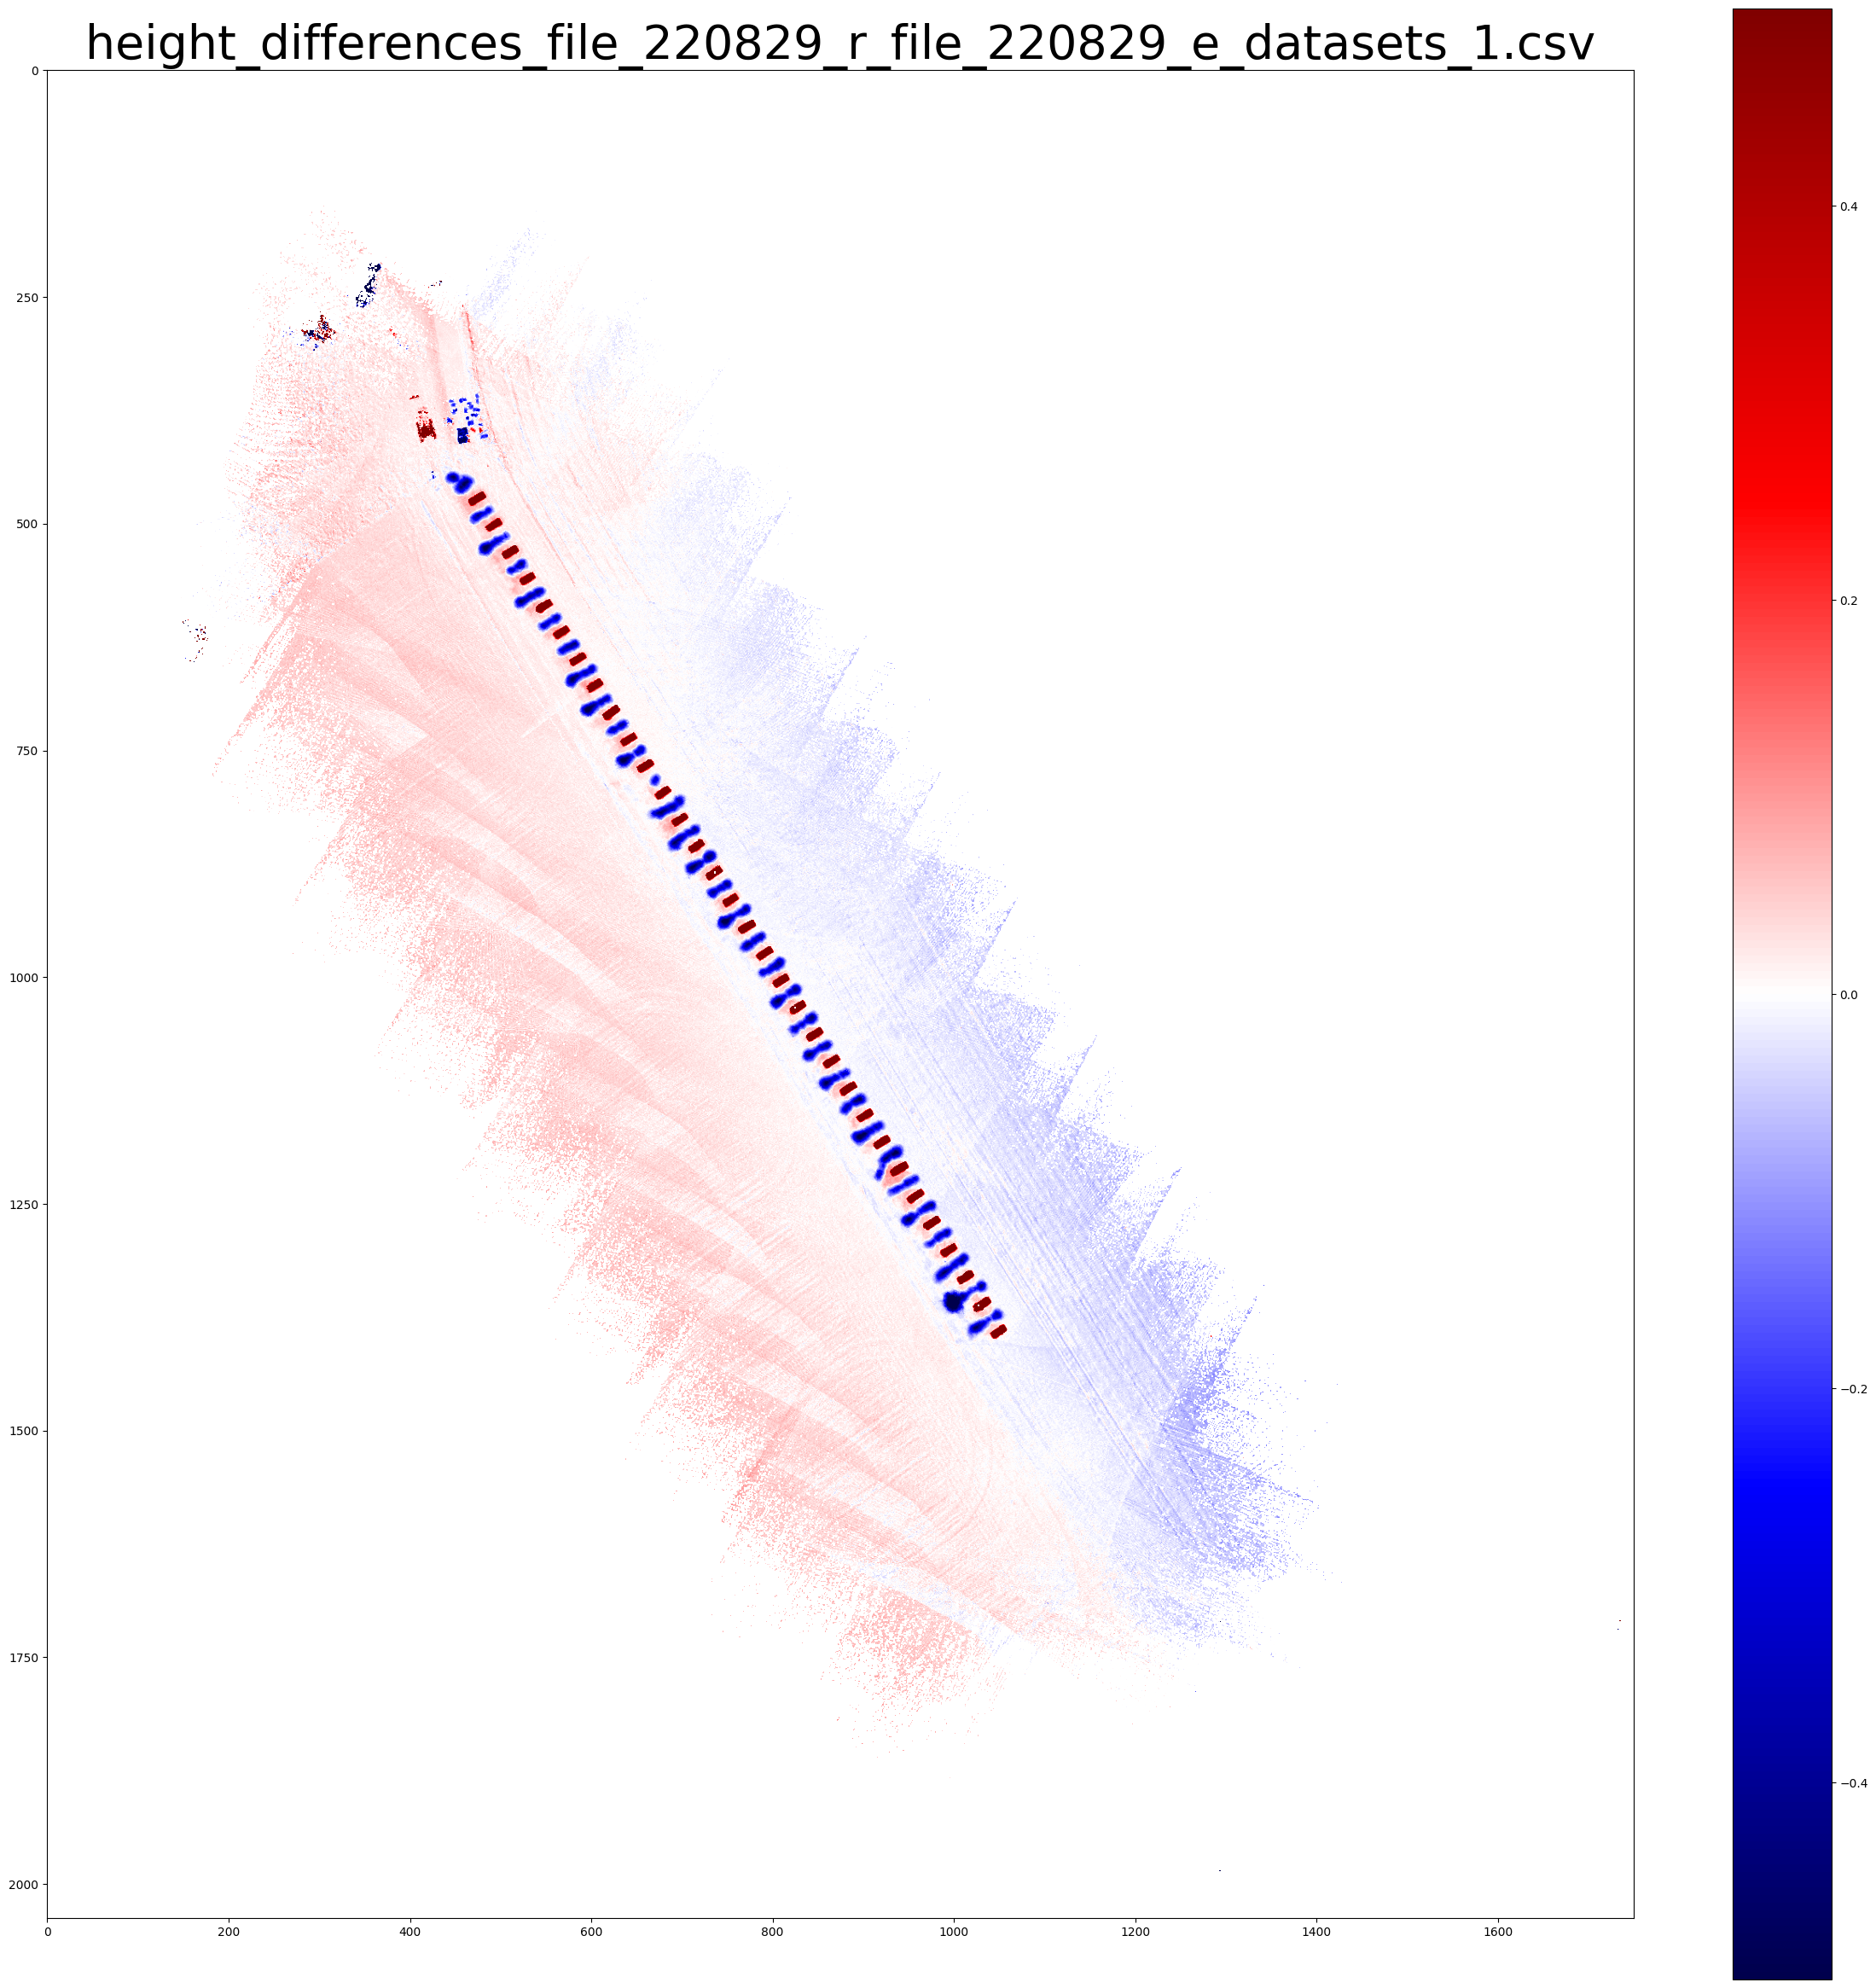

In [58]:
#z differences in about ? days between 221101 (66 days after burial) and 221128 (93 days after burial) (decimated to 5cm squares)

file1 = "file_220829_r"
file2 = "file_220829_e"
datasetname = "datasets_1"
zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='x', index='y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))

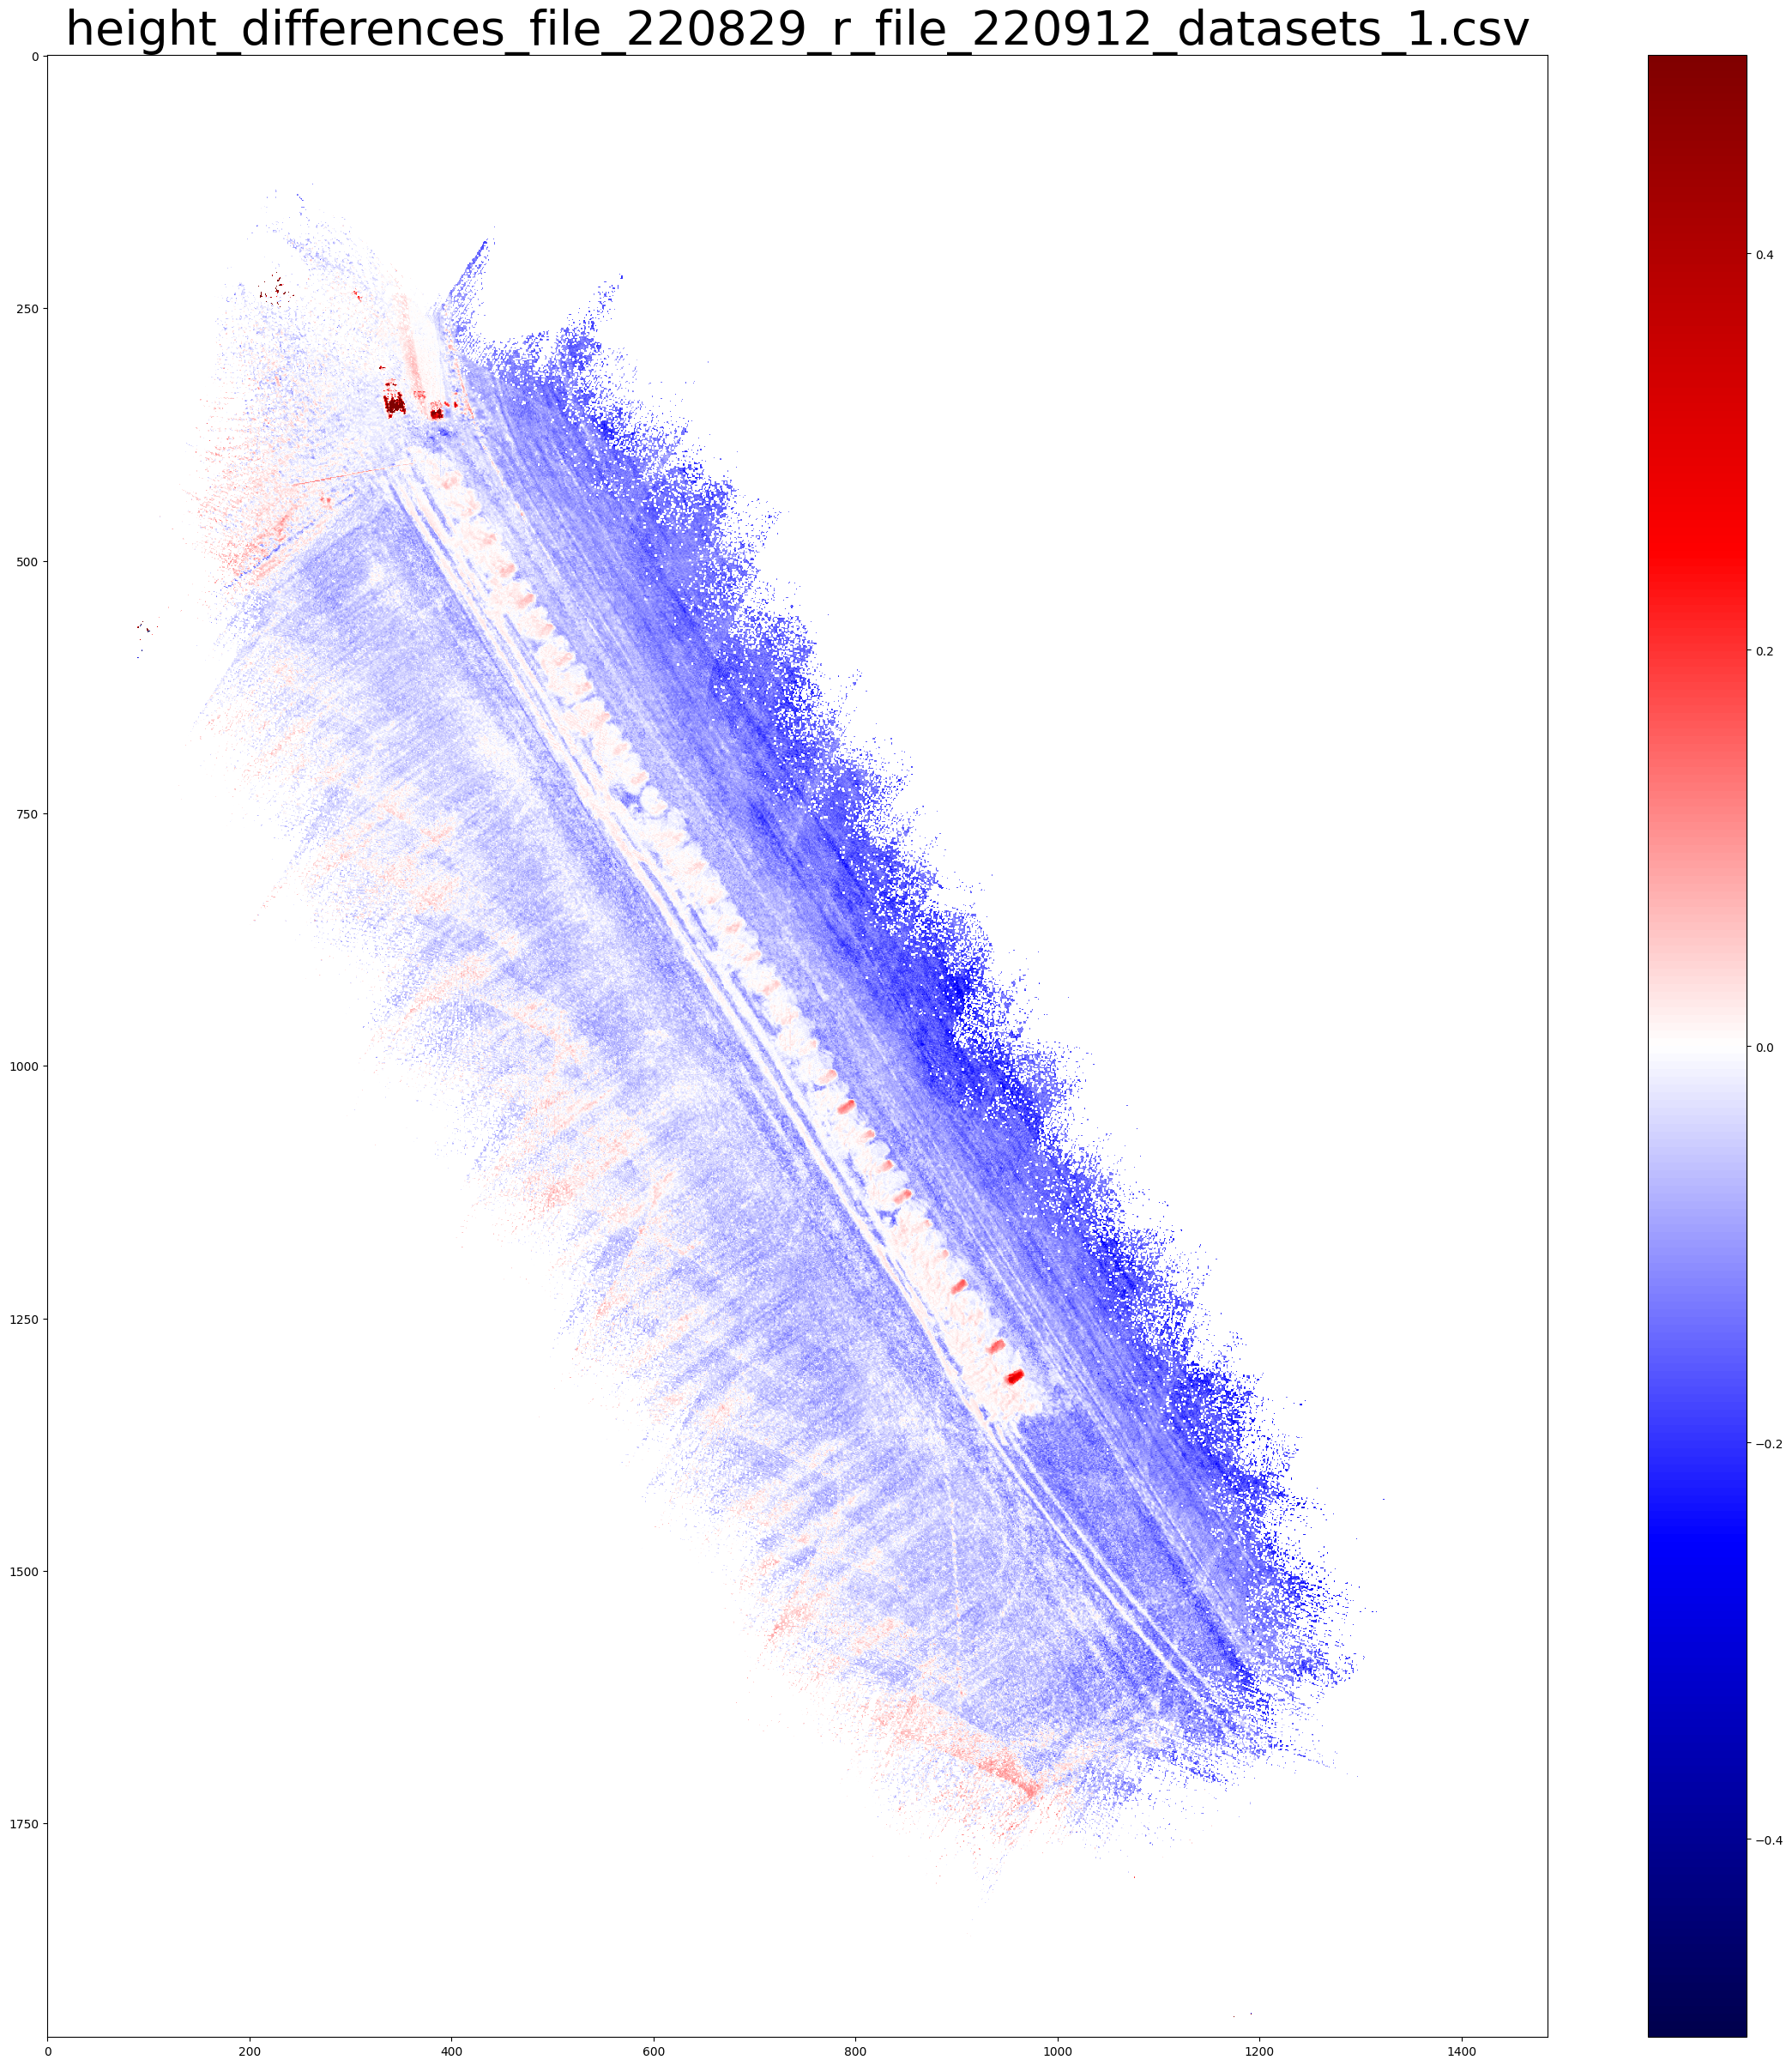

In [8]:
#z differences in about ? days between 221101 (66 days after burial) and 221128 (93 days after burial) (decimated to 5cm squares)

file1 = "file_220829_r"
file2 = "file_220912"
datasetname = "datasets_1"
zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='x', index='y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))

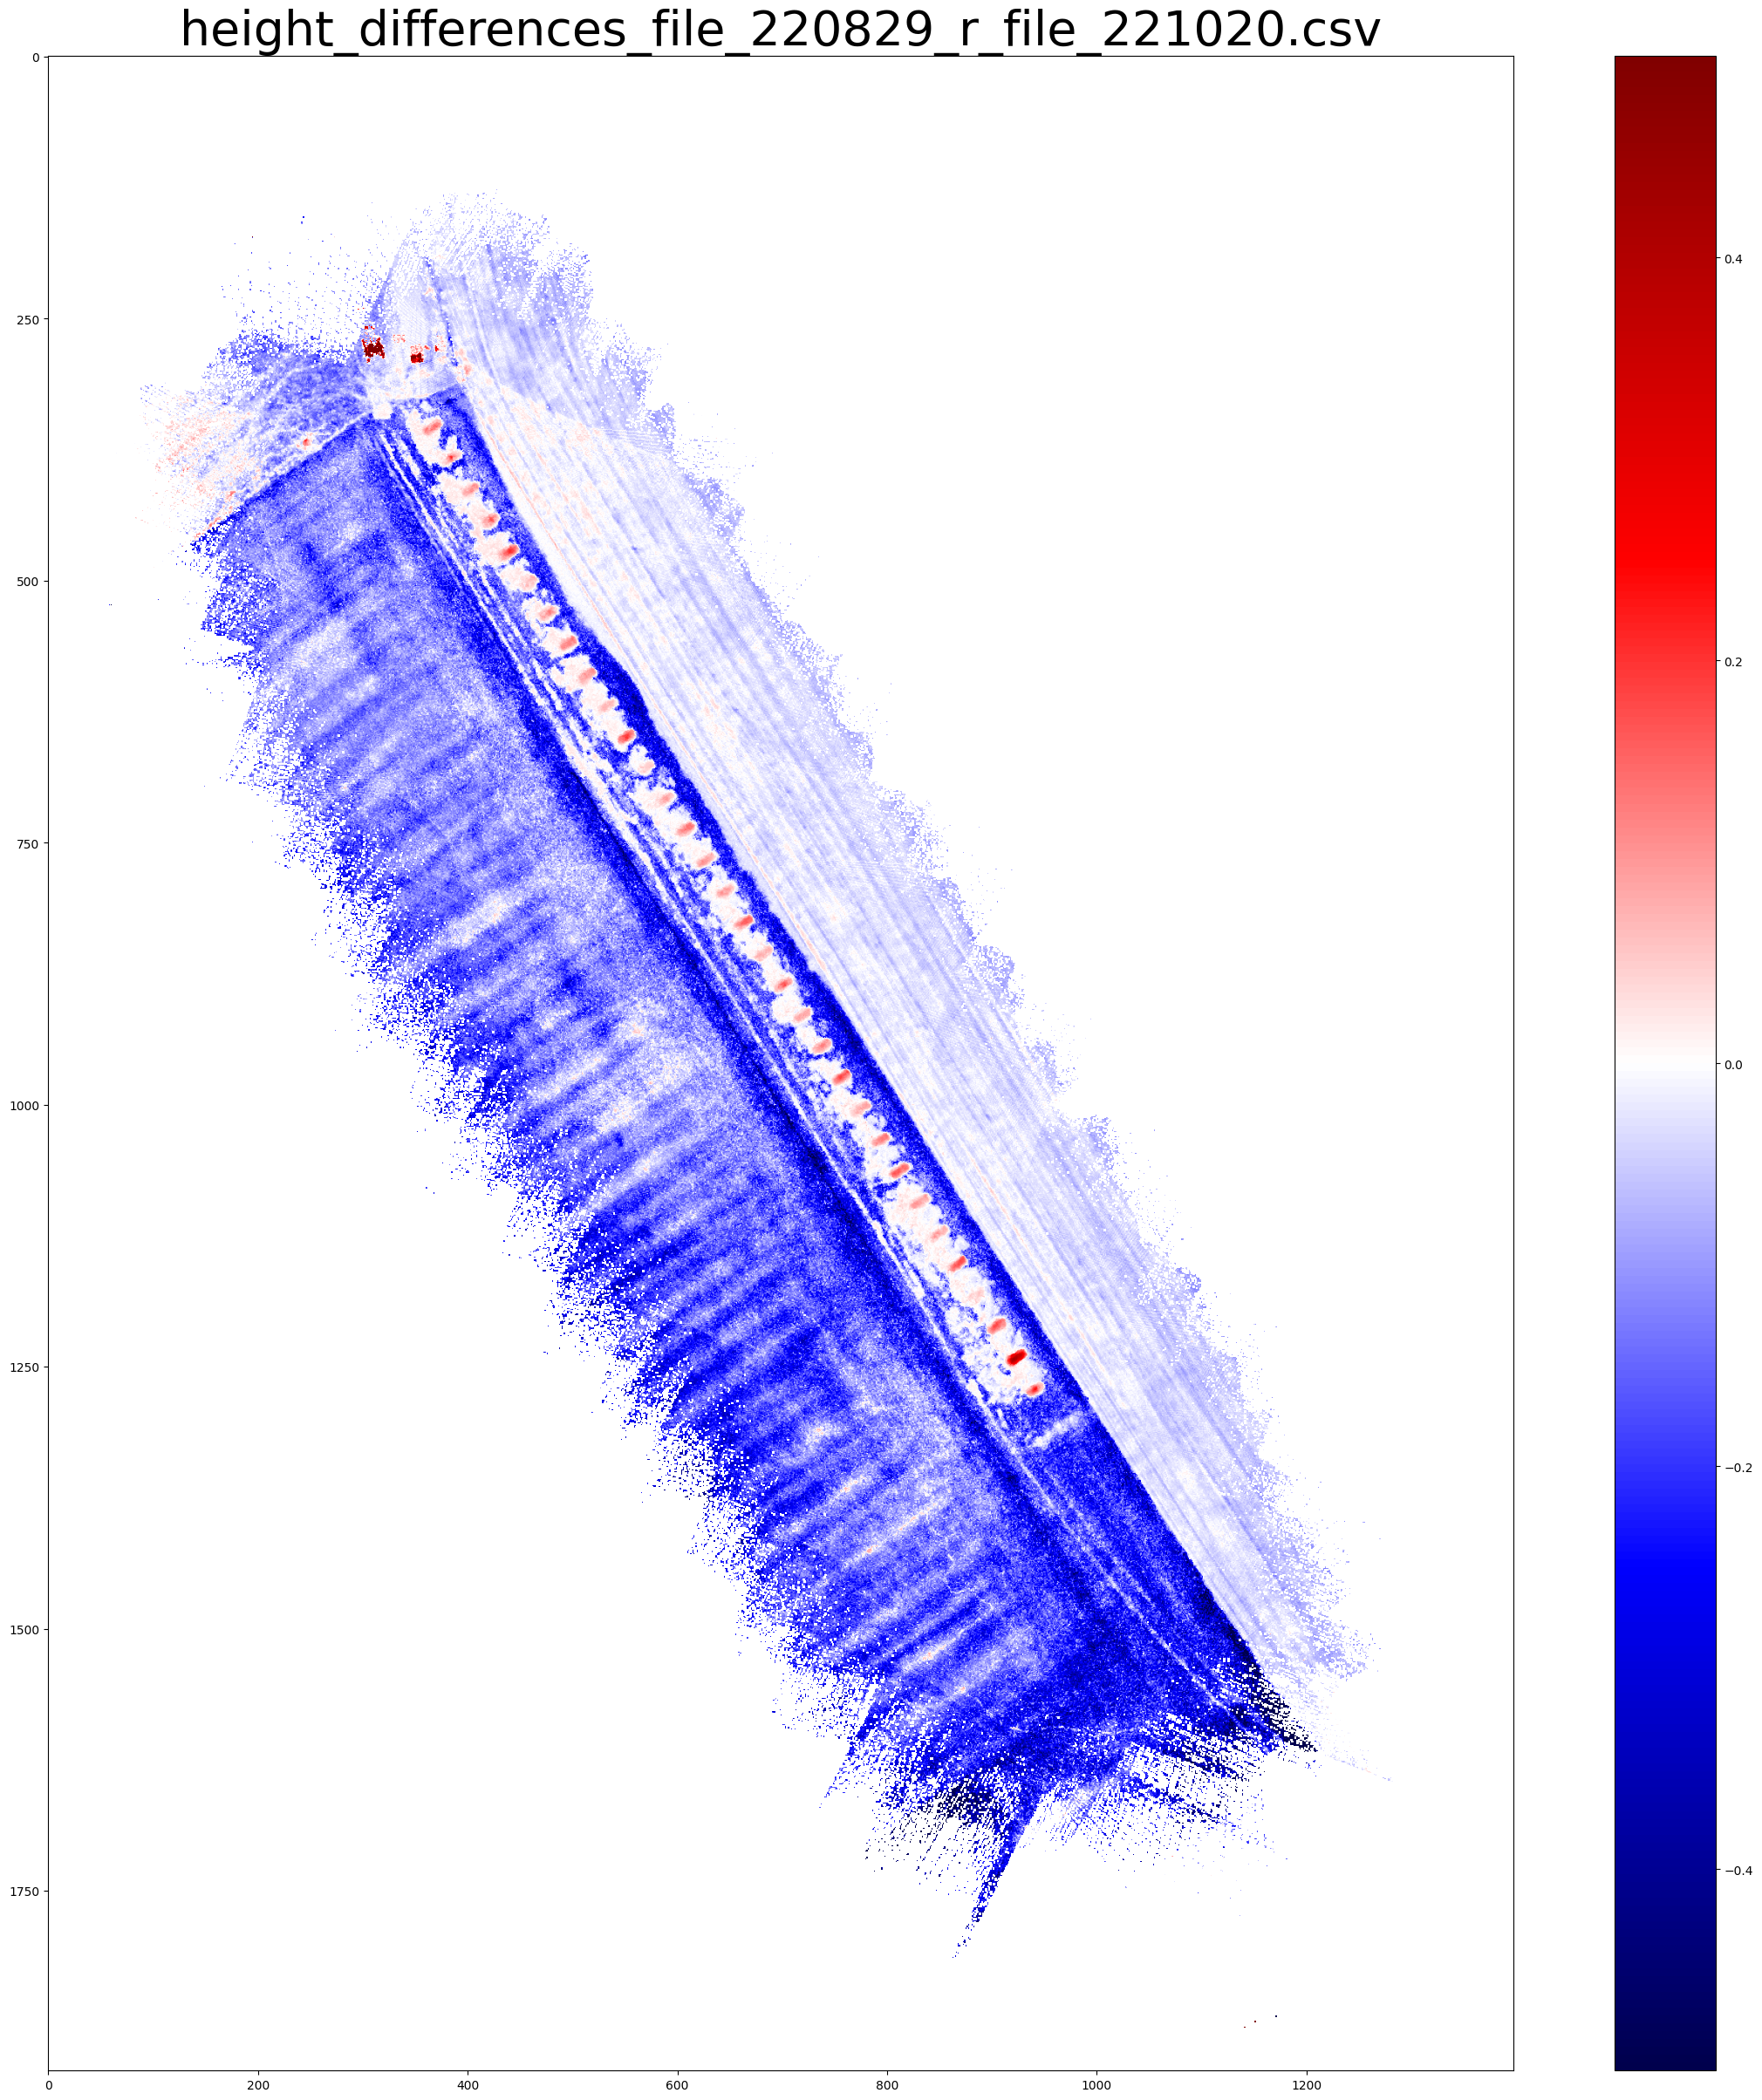

In [6]:
#z differences in about 11 days between 221117 (82 days after burial) and 221128 (93 days after burial) (decimated to 5cm squares)

file1 = "file_220829_r"
file2 = "file_221020"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))

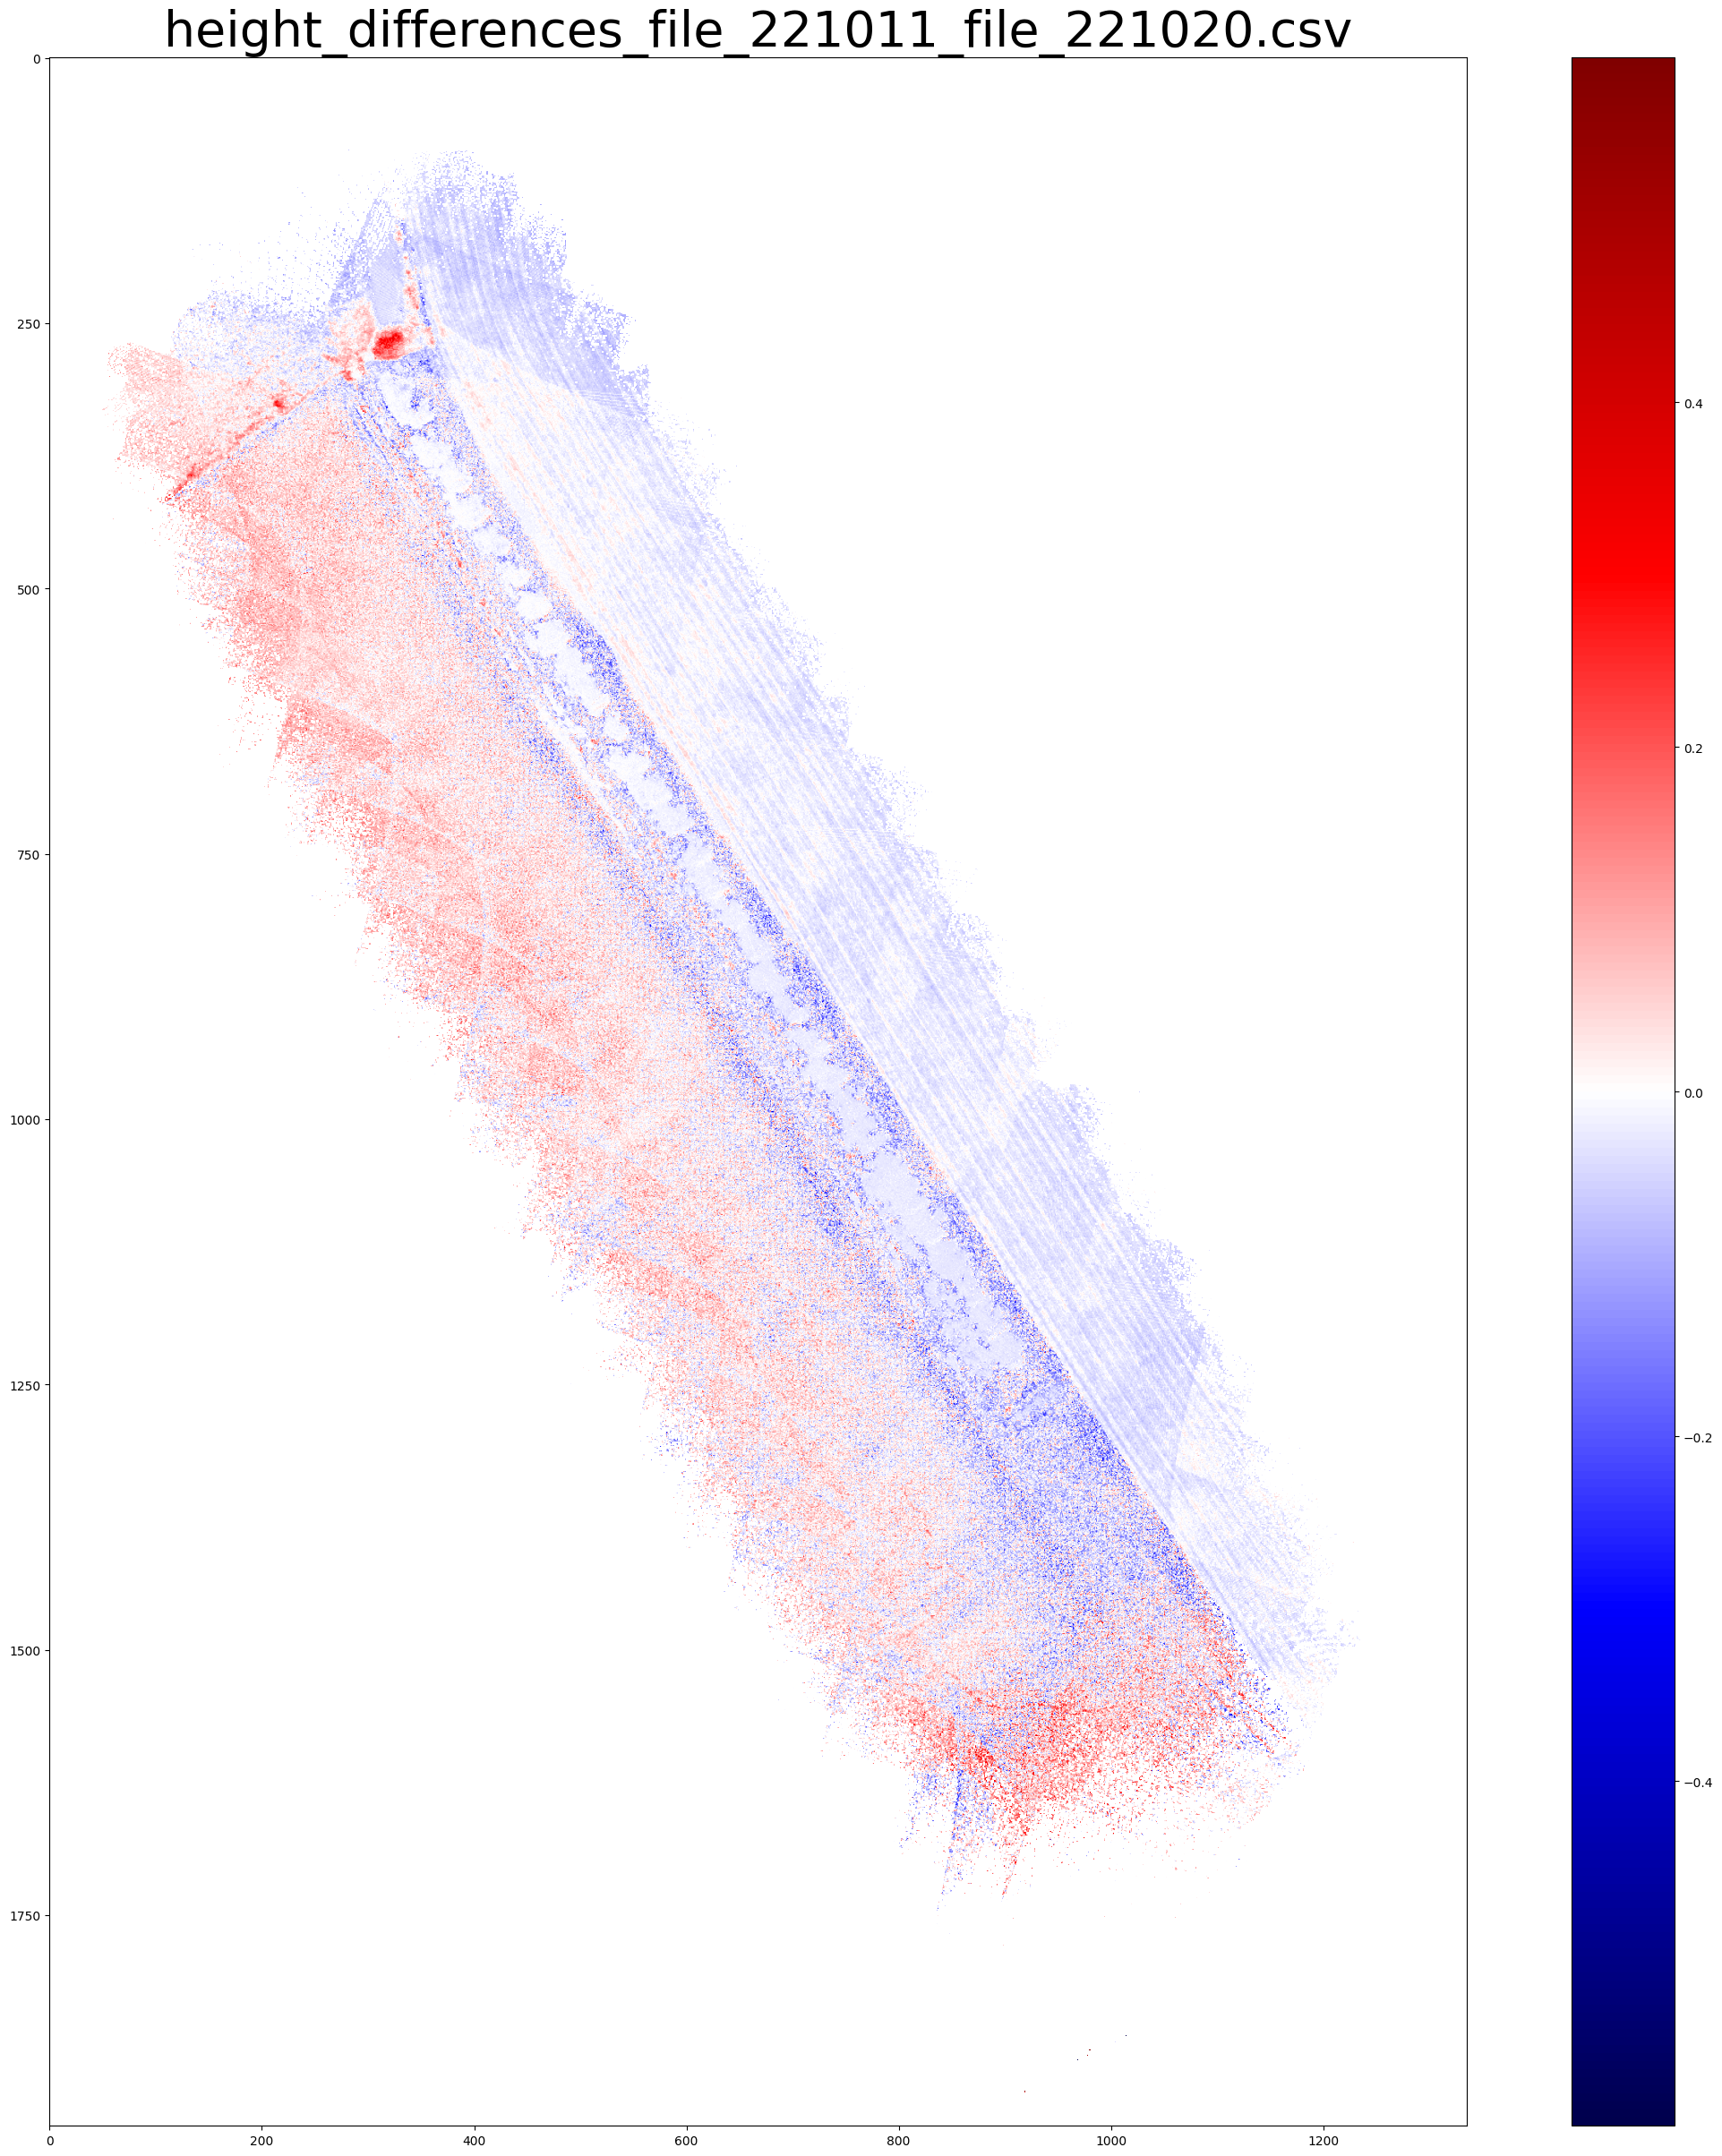

In [11]:
#z differences in about 53 days between 221128 (93 days after burial) and 230119 (decimated to 5cm squares)

file1 = "file_221011"
file2 = "file_221020"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.6, vcenter=0, vmax=0.6)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))

In [ ]:
#z differences in about 1 week between 220905 and 220829 (open graves) (decimated to 5cm squares)

file1 = "file_220905"
file2 = "file_220829"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.6, vcenter=0, vmax=0.6)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))

In [7]:
#z differences in about 1 week between 220905 and 220912 (decimated to 5cm squares)

file1 = "file_220829_r"
file2 = "file_220912"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.6, vcenter=0, vmax=0.6)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))

KeyError: 'grid_y'

In [ ]:
#z differences in 46 days between 220905 and 221020 (decimated to 5cm squares)
#very few datapoints because "file_221020" is a point cloud from 60m high instead of 15m.

file1 = "file_220905"
file2 = "file_221020"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=0.6)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))

In [ ]:
#z differences in 58 days between 220905 and 221101 (decimated to 5cm squares)

file1 = "file_220905"
file2 = "file_221101"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.6, vcenter=0, vmax=0.6)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))

In [ ]:
#z differences in 74 days between 220905 and 221117 (decimated to 5cm squares)

file1 = "file_220905"
file2 = "file_221117"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.6, vcenter=0, vmax=0.6)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))

In [ ]:
#z differences in 85 days between 220905 and 221128 (decimated to 5cm squares)


file1 = "file_220905"
file2 = "file_221128"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.6, vcenter=0, vmax=0.6)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))

In [ ]:
#z differences in 137 days between 220905 and 230119 (decimated to 5cm squares)

file1 = "file_220905"
file2 = "file_230119"

zdiff = pd.read_csv(difference_file_name(file1, file2))

grid = zdiff.reset_index().pivot_table(columns='grid_x', index='grid_y', values='z')
plt.figure(figsize=(30, 30))
#grid.values[np.abs(grid.values) > 0.8] = np.nan
divnorm=colors.TwoSlopeNorm(vmin=-0.6, vcenter=0, vmax=0.6)
plt.title(difference_file_name(file1, file2), fontsize=40)
plt.imshow(grid.values, cmap = mpl.colormaps['seismic'], norm=divnorm)

plt.colorbar()

plt.savefig(difference_file_name(file1, file2).replace(".csv", ".png"))